In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as t
plt.style.use("dark_background")
df = pd.read_csv("./time_evolution_10_levels.csv")
df = df.drop(df[df.bid_price_0 <= 0].index)
df = df.drop(df[df.ask_price_0 <= 0].index)

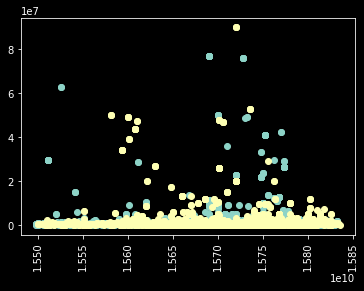

In [61]:
plt.scatter(df["bid_price_0"], df["bid_volume_0"])
plt.scatter(df["ask_price_0"], df["ask_volume_0"])
#plt.ylim((2 * 10 ** 7, 8 * 10 ** 7))
#plt.xlim((1.5690 * 10 ** 10, 1.578 * 10 ** 10))
plt.tick_params(axis='x', rotation=90, labelsize=10)
#plt.xticks(ticks=list(df[df[df["bid_volume_0"] > 2 * 10 ** 7]["bid_price_0"] > 1.5690 * 10 ** 10]["bid_price_0"]))
#plt.xticks(ticks=list(df[(df["bid_price_0"] % 5 * 10 ** 7) == 0]["bid_price_0"]))
plt.show()